# Perform PCA of treatment naive samples hallmark NES

Script related to figure 1d, e

### Aim:
- See how Hallmark NES cluster across patients

In [2]:
!python --version

Python 3.6.8 :: Anaconda custom (64-bit)


## Import packages

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [4]:
home = "~/git_repos/HGSOC_TME_Heterogeneity/"

## Get sample labels

### Load file

In [6]:
file_keys = home + "/Data/1/TreatmentNaive_SampleLabels_WESTumourCellularity.txt"

sample_labels = pd.read_csv(file_keys,
                            sep='\t',
                            index_col='Well')

In [7]:
sample_labels.head()

,Label,Key,Case_mRNA,Site,Habitat,Case_WES,Tumour_WES,Colour,Site_marker,TumourCellularity_WES
Well,,,,,,,,,,
A01,A01_3640_5_Omentum,case10_omentum_green,10,omentum,green,10.0,5,#ff7f00,^,0.5973
A02,A02_3640_7_Omentum,case10_omentum_blue,10,omentum,blue,10.0,7,#ff7f00,^,0.5065
A03,A03_3640_9_Paracolic_Gutter,case10_paracolic_yellow,10,other,yellow,10.0,8,#ff7f00,s,0.4551
A04,A04_3640_17_R_Adnexa,case10_Radnexa_yellow,10,ovary,yellow,10.0,17,#ff7f00,o,0.6496
A05,A05_3640_18_R_Adnexa,case10_Radnexa_blue,10,ovary,blue,10.0,18,#ff7f00,o,0.6706


### Define sample colours

In [8]:
case_mrna = list(set(sample_labels['Case_mRNA']))

colours = sns.color_palette("Set1", 8).as_hex()

sample_labels['Colour'] = sample_labels['Case_mRNA'].replace(case_mrna, colours)

### Define sample markers

In [9]:
sites = ['ovary','omentum','other']
markers = ['o','^','s']

sample_labels['Site_marker'] = sample_labels['Site'].replace(sites,markers)

In [10]:
sample_labels.head()

,Label,Key,Case_mRNA,Site,Habitat,Case_WES,Tumour_WES,Colour,Site_marker,TumourCellularity_WES
Well,,,,,,,,,,
A01,A01_3640_5_Omentum,case10_omentum_green,10,omentum,green,10.0,5,#ff7f00,^,0.5973
A02,A02_3640_7_Omentum,case10_omentum_blue,10,omentum,blue,10.0,7,#ff7f00,^,0.5065
A03,A03_3640_9_Paracolic_Gutter,case10_paracolic_yellow,10,other,yellow,10.0,8,#ff7f00,s,0.4551
A04,A04_3640_17_R_Adnexa,case10_Radnexa_yellow,10,ovary,yellow,10.0,17,#ff7f00,o,0.6496
A05,A05_3640_18_R_Adnexa,case10_Radnexa_blue,10,ovary,blue,10.0,18,#ff7f00,o,0.6706


## Load ssGSEA results

In [11]:
file_nes = home + "/Data/1/HallmarksStromaImmune_NES.txt"

data_nes = pd.read_csv(file_nes,
                       sep='\t')

data_nes.set_index('Term',
                   inplace=True)

In [12]:
data_nes.head()

,A01,A02,A03,A04,A05,A06,A07,A08,A09,A10,...,C06,C07,C08,C09,C10,C11,C12,D01,D02,D03
Term,,,,,,,,,,,,,,,,,,,,,
HALLMARK_TNFA_SIGNALING_VIA_NFKB,0.136576,0.162253,0.167945,0.165872,0.108271,0.103383,0.068362,0.070162,0.111527,0.099024,...,0.128145,0.259154,0.215689,0.112651,0.200294,0.241995,0.191432,0.194714,0.189336,0.069653
HALLMARK_HYPOXIA,0.177768,0.218287,0.206637,0.228075,0.213340,0.195107,0.184773,0.176688,0.208509,0.224903,...,0.232953,0.285186,0.258845,0.242334,0.280114,0.263157,0.261287,0.254170,0.255099,0.170139
HALLMARK_CHOLESTEROL_HOMEOSTASIS,0.291056,0.307171,0.304042,0.302902,0.291291,0.302667,0.250307,0.307460,0.336655,0.289155,...,0.297822,0.311574,0.314954,0.327364,0.357201,0.325969,0.328308,0.310308,0.333764,0.306016
HALLMARK_MITOTIC_SPINDLE,0.291324,0.341755,0.332683,0.358085,0.319437,0.350527,0.438601,0.359659,0.365710,0.397053,...,0.347654,0.339620,0.356477,0.354890,0.399129,0.355274,0.337599,0.329370,0.332419,0.311622
HALLMARK_WNT_BETA_CATENIN_SIGNALING,0.151231,0.184140,0.186732,0.263275,0.215427,0.224450,0.246089,0.243030,0.228552,0.258536,...,0.126257,0.189395,0.180498,0.166626,0.236770,0.185633,0.147549,0.142399,0.126891,0.110339


### Check empty cells

In [13]:
set(data_nes.isnull().sum())

{0}

## Load mRNA tumour cellularity data

In [15]:
mRNA_tumcell_file = home + "/Data/1/TreatmentNaive_log2exp_loess_norm_filtered_ESTIMATE.txt"

mRNA_tumcell = pd.read_csv(mRNA_tumcell_file,
                           skiprows=2,
                           sep='\t',
                           index_col='NAME')

del(mRNA_tumcell['Description'])

In [16]:
mRNA_tumcell.head()

,A01,A02,A03,A04,A05,A06,A07,A08,A09,A10,...,C06,C07,C08,C09,C10,C11,C12,D01,D02,D03
NAME,,,,,,,,,,,,,,,,,,,,,
StromalScore,213.898183,441.185072,627.161634,-257.879171,-105.932457,-179.742309,-667.871861,-554.187271,-467.547274,-424.048973,...,276.215651,819.700176,542.094611,446.049523,100.214812,640.683420,1028.302292,631.494907,843.594952,-393.705822
ImmuneScore,789.397143,1103.963967,996.569838,119.238243,354.124225,197.378769,-395.243536,-16.422432,-469.452988,-563.011739,...,-18.442529,526.734281,-25.089182,238.412959,-60.730519,890.081437,776.296638,680.327079,892.726571,-226.504212
ESTIMATEScore,1003.295326,1545.149039,1623.731472,-138.640928,248.191767,17.636459,-1063.115397,-570.609703,-937.000262,-987.060713,...,257.773122,1346.434456,517.005428,684.462482,39.484294,1530.764858,1804.598930,1311.821985,1736.321523,-620.210034
TumorPurity,0.730147,0.673548,0.664978,0.833913,0.801248,0.821034,0.900910,0.867208,0.892722,0.896009,...,0.800405,0.694819,0.777021,0.761314,0.819199,0.675108,0.644917,0.698464,0.652544,0.870811


### Add mRNA tumour cellularity to NES dataframe

In [17]:
data_nes_t = data_nes.T 

#### Multiply tumour cellularity times a small number to reduce it's impact in the PCA

In [18]:
data_nes_t['TumourCellularity_mRNA'] = mRNA_tumcell.loc['TumorPurity'] * 0.0001

In [19]:
data_nes = data_nes_t.T

In [20]:
data_nes.tail()

,A01,A02,A03,A04,A05,A06,A07,A08,A09,A10,...,C06,C07,C08,C09,C10,C11,C12,D01,D02,D03
Term,,,,,,,,,,,,,,,,,,,,,
HALLMARK_KRAS_SIGNALING_DN,-0.240767,-0.274158,-0.231857,-0.240881,-0.228270,-0.240445,-0.196578,-0.239584,-0.238470,-0.236185,...,-0.242543,-0.231446,-0.232364,-0.218667,-0.252284,-0.214025,-0.224493,-0.195860,-0.218489,-0.198529
HALLMARK_PANCREAS_BETA_CELLS,-0.170571,-0.158940,-0.230501,-0.147195,-0.209698,-0.166047,-0.163780,-0.171125,-0.128802,-0.200665,...,-0.181282,-0.161556,-0.172433,-0.101169,-0.136589,-0.175828,-0.131121,-0.125134,-0.137935,-0.160385
StromalSignature,0.087415,0.136906,0.166492,0.010237,0.034615,0.021982,-0.067309,-0.046947,-0.026127,-0.022315,...,0.109234,0.203958,0.155354,0.134444,0.076000,0.175493,0.250390,0.172685,0.212197,-0.014386
ImmuneSignature,0.192483,0.256464,0.230664,0.080746,0.117609,0.089100,-0.014748,0.049217,-0.023908,-0.045061,...,0.053588,0.152762,0.052564,0.097643,0.051716,0.220956,0.205281,0.183085,0.224095,0.012900
TumourCellularity_mRNA,0.000073,0.000067,0.000066,0.000083,0.000080,0.000082,0.000090,0.000087,0.000089,0.000090,...,0.000080,0.000069,0.000078,0.000076,0.000082,0.000068,0.000064,0.000070,0.000065,0.000087


### Visulase NES

#### Samples

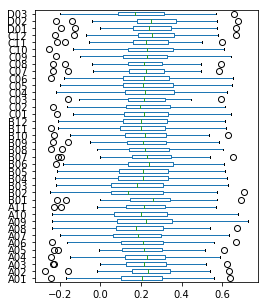

In [21]:
data_nes.plot(kind='box',
              vert=False,
              figsize=(4,5))

#### Variables

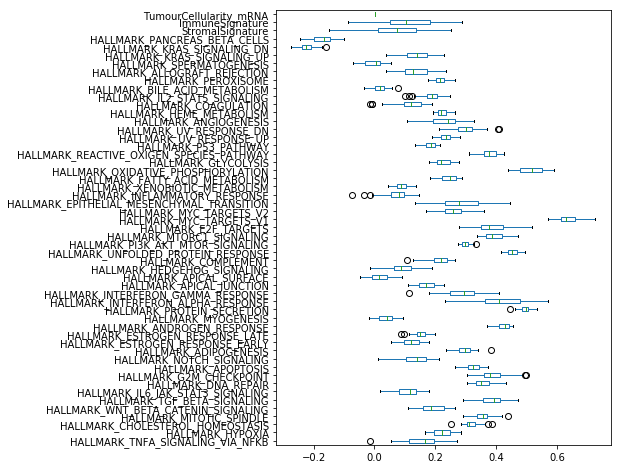

In [22]:
data_nes.transpose().plot(kind='box',
                          vert=False,
                          figsize=(6,8))

## Calculate PCA

In [23]:
pca = PCA(n_components=7)

In [24]:
pca_nes = pca.fit_transform(data_nes.transpose())

In [25]:
len(pca_nes) # check number of data points

38

#### Get PCA loadings

In [26]:
var_exp = pca.explained_variance_ratio_
var_exp

array([0.47349103, 0.15671211, 0.11890077, 0.05959022, 0.03633084,
       0.0354101 , 0.01995393])

## Plot PCA

### Create custom colormaps (a.k.a. cmaps)

In [27]:
def make_cmap(colors, position=None, bit=False):
    
    '''
    make_cmap takes a list of tuples which contain RGB values. The RGB
    values may either be in 8-bit [0 to 255] (in which bit must be set to
    True when called) or arithmetic [0 to 1] (default). make_cmap returns
    a cmap with equally spaced colors.
    Arrange your tuples so that the first color is the lowest value for the
    colorbar and the last is the highest.
    position contains values from 0 to 1 to dictate the location of each color.
    '''
    import matplotlib as mpl
    import numpy as np
    bit_rgb = np.linspace(0,1,256)
    if position == None:
        position = np.linspace(0,1,len(colors))
    else:
        if len(position) != len(colors):
            sys.exit("position length must be the same as colors")
        elif position[0] != 0 or position[-1] != 1:
            sys.exit("position must start with 0 and end with 1")
    if bit:
        for i in range(len(colors)):
            colors[i] = (bit_rgb[colors[i][0]],
                         bit_rgb[colors[i][1]],
                         bit_rgb[colors[i][2]])
    cdict = {'red':[], 'green':[], 'blue':[]}
    for pos, color in zip(position, colors):
        cdict['red'].append((pos, color[0], color[0]))
        cdict['green'].append((pos, color[1], color[1]))
        cdict['blue'].append((pos, color[2], color[2]))

    cmap = mpl.colors.LinearSegmentedColormap('my_colormap',cdict,256)
    
    return cmap

### Convert hex to rgb colour

In [28]:
def hex_to_rgb(value):
    
    '''Return (red, green, blue) for the color given as #rrggbb.'''
    
    value = value.lstrip('#')
    lv = len(value)
    
    return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))

### Define cmaps for patient kernel densities

In [29]:
white = (255,255,255)

reds    = make_cmap([white, hex_to_rgb('#e41a1c')], bit=True)
blues   = make_cmap([white, hex_to_rgb('#377eb8')], bit=True)
greens  = make_cmap([white, hex_to_rgb('#4eae4b')], bit=True)
purples = make_cmap([white, hex_to_rgb('#994fa1')], bit=True)
oranges = make_cmap([white, hex_to_rgb('#ff8101')], bit=True)
yellows = make_cmap([white, hex_to_rgb('#fdfc33')], bit=True)
browns  = make_cmap([white, hex_to_rgb('#a8572c')], bit=True)
pinks   = make_cmap([white, hex_to_rgb('#f482be')], bit=True)

reds_r    = make_cmap([hex_to_rgb('#e41a1c'), white], bit=True)
blues_r   = make_cmap([hex_to_rgb('#377eb8'), white], bit=True)
greens_r  = make_cmap([hex_to_rgb('#4eae4b'), white], bit=True)
purples_r = make_cmap([hex_to_rgb('#994fa1'), white], bit=True)
oranges_r = make_cmap([hex_to_rgb('#ff8101'), white], bit=True)
yellows_r = make_cmap([hex_to_rgb('#fdfc33'), white], bit=True)
browns_r  = make_cmap([hex_to_rgb('#a8572c'), white], bit=True)
pinks_r   = make_cmap([hex_to_rgb('#f482be'), white], bit=True)

### Colour-sample correspondence

In [30]:
color_case_d = {1:reds,
                4:blues,
                5:greens,
                6:purples,
                10:oranges,
                13:yellows,
                16:browns,
                17:pinks}

color_case_dr = {1:reds_r,
                 4:blues_r,
                 5:greens_r,
                 6:purples_r,
                 10:oranges_r,
                 13:yellows_r,
                 16:browns_r,
                 17:pinks_r}

### Plot PCA

In [31]:
pcx=0
pcy=1

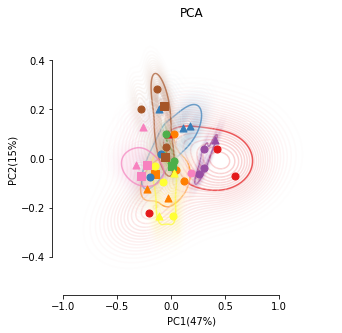

In [32]:
fig = plt.figure(figsize=(5, 5))

plt.title('PCA')

d_kde = {}
for i in range(len(pca_nes[:, 0])):
    
    plt.scatter(pca_nes[:,pcx][i],
                pca_nes[:,pcy][i],
                c=list(sample_labels['Colour'])[i],
                edgecolors=list(sample_labels['Colour'])[i],
                marker=list(sample_labels['Site_marker'])[i],
                zorder=1,
                lw=1,
                s=50)
    
    if list(sample_labels['Case_mRNA'])[i] not in d_kde:
        
        d_kde[list(sample_labels['Case_mRNA'])[i]] = {'x':[pca_nes[:,pcx][i]],
                                                      'y':[pca_nes[:,pcy][i]]}
    else:
        
        d_kde[list(sample_labels['Case_mRNA'])[i]]['x'].append(pca_nes[:,pcx][i])
        d_kde[list(sample_labels['Case_mRNA'])[i]]['y'].append(pca_nes[:,pcy][i])
      
for j in d_kde:
    
    # shadow
    sns.kdeplot(np.array(d_kde[j]['x']),
                np.array(d_kde[j]['y']),
                cmap=color_case_d[j],
                n_levels=27,
                alpha=.2,
                zorder=0,
                cut=3,
                shade=False)
    
    # circles
    sns.kdeplot(np.array(d_kde[j]['x']),
                np.array(d_kde[j]['y']), 
                cmap=color_case_dr[j],
                n_levels=1,
                alpha=.7,
                zorder=0,
                cut=3,
                shade=False)

xlabel = 'PC%i(%i%s)' % (pcx+1,var_exp[pcx]*100,'%')
ylabel = 'PC%i(%i%s)' % (pcy+1,var_exp[pcy]*100,'%')

plt.xlabel(xlabel)
plt.ylabel(ylabel)
sns.despine(trim=True)

### Save plot

In [33]:
ls ../../Figures/main/1/

OVCT_Fig_m1.pdf  OVCT_Fig_m1.png  README.md        panels/


In [36]:
FILE = "../../Figures/main/1/panels/1d_TreatmentNaive_Hallmarks_PCA_%s_%s.pdf" % (pcx,pcy)

fig.savefig(FILE, bbox='tight')

### Plot PCA loadings

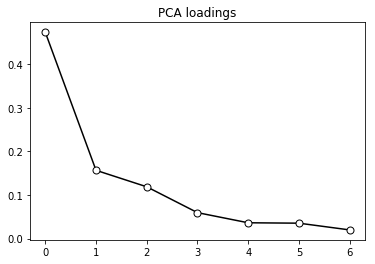

In [38]:
fig = plt.figure()

plt.title('PCA loadings')

plt.plot(var_exp, 'o', mfc='w', c='k', zorder=2, ms=7)
plt.plot(var_exp, '-', c='k', zorder=1)

### Save plot

In [40]:
FILE = "../../Figures/supplementary/1/panels/s1c_TreatmentNaive_Hallmarks_PCA_loadings.pdf"

fig.savefig(FILE, bbox='tight')

# End script